# Project Overview  

This project consists of four CNN models for fashion image classification:  

1. **Primary Category Model** – Classifies images into three main categories:  
   - Glasses/Sunglasses  
   - Trousers/Jeans  
   - Shoes  

2. **Eyewear Model** – Distinguishes between:  
   - Glasses  
   - Sunglasses  

3. **Trousers Model** – Classifies trousers and jeans by gender:  
   - Trousers Male   
   - Jeans Male
   - Trousers Female  
   - Jeans Female 

4. **Footwear Model** – Classifies different types of shoes:  
   - Boots 
   - Trainers/Sneakers 
   - Sandals/Slippers  
   - Formal Shoes   
   - Others   

Each model is trained separately on its respective subset of the dataset to improve classification accuracy.


# Import Relevant Libraries  
Importing all the necessary libraries used for data processing, model building, and evaluation in this CNN project.


In [8]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools
import datetime

# Load the Dataset  
Loading the preprocessed dataset from `.npz` files and splitting it into training, validation, and testing sets.


In [10]:
data_train = np.load("Dataset/primary/Primary categories - Train.npz")
data_val = np.load("Dataset/primary/Primary categories - validation.npz")
data_test = np.load("Dataset/primary/Primary categories - Test.npz")

In [11]:
print(f" Train shpe: {np.shape(data_train["images"])}")
print(f" Validation shpe: {np.shape(data_val["images"])}")
print(f" Test shpe: {np.shape(data_test["images"])}")


 Train shpe: (12963, 120, 90, 3)
 Validation shpe: (1620, 120, 90, 3)
 Test shpe: (1620, 120, 90, 3)


# Extract Images and Labels  
Extracting image data and corresponding labels from the training, validation, and testing datasets.


In [13]:
images_train = data_train["images"]
labels_train = data_train["labels"]

images_val = data_val["images"]
labels_val = data_val["labels"]

images_test = data_test["images"]
labels_test = data_test["labels"]

# Normalize Image Data  
Normalizing pixel values to the range [0, 1] to improve model training stability and performance.


In [19]:
images_train = images_train / 255.0
images_val = images_val / 255.0
images_test = images_test / 255.0

# Build the CNN Model  
Defining a Convolutional Neural Network (CNN) using TensorFlow.  
The model consists of two convolutional and max-pooling layers, followed by a flattening layer and a fully connected output layer.


In [22]:
num_epochs = 20 
batch_size = 64 


model_primary = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64 , 5 , activation = "relu" , input_shape = (120 , 90 ,3)),
    tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = 2),

    tf.keras.layers.Conv2D(32 , 3 , activation = "relu" ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = 2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(3)
])

C:\Users\rasol\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Define Loss Function and Callbacks and log
Setting up the loss function and training callbacks:  

In [28]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

log_dir = "logs//fit//primary//" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir , histogram_freq = 1)

## Compile and Train Model  

In [34]:
model_primary.compile(optimizer = "adam" , loss = loss_fn , metrics = ["accuracy"])

In [36]:
model_primary.fit(images_train , labels_train ,
          validation_data = (images_val , labels_val) ,
          shuffle = True ,
          epochs = num_epochs ,
          callbacks = [tensorboard_callback , early_stopping],
          batch_size = batch_size)

Epoch 1/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 35s 169ms/step - accuracy: 0.9024 - loss: 0.2647 - val_accuracy: 0.9957 - val_loss: 0.0121
Epoch 2/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 34s 165ms/step - accuracy: 0.9973 - loss: 0.0138 - val_accuracy: 0.9932 - val_loss: 0.0399
Epoch 3/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 34s 168ms/step - accuracy: 0.9956 - loss: 0.0220 - val_accuracy: 0.9981 - val_loss: 0.0083
Epoch 4/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 33s 163ms/step - accuracy: 0.9991 - loss: 0.0089 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 5/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 34s 165ms/step - accuracy: 0.9982 - loss: 0.0113 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 6/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 33s 161ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9975 - val_loss: 0.0119


# Evaluate the Model  
Evaluating the trained CNN model on the test dataset to measure its final performance.  
The overall test accuracy is printed to summarize the model’s generalization capability.

In [41]:
_, model_primary_accuracy = model_primary.evaluate(images_test , labels_test)
print(f"The model accuracy on test data is {model_primary_accuracy}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9974 - loss: 0.0320
The model accuracy on test data is 0.9981481432914734


# Make Predictions  
Generating predictions on the test dataset.  

In [43]:
predictions = model_primary.predict(images_test)
probabilities = tf.nn.softmax(predictions).numpy() *100
predictions_class = np.argmax(predictions , axis = 1)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


# Confusion Matrix and Classification Report  

Computing and visualizing the confusion matrix to evaluate the model’s performance across all classes.  
- The `plot_confusion_matrix` function displays the confusion matrix with optional normalization.  
- `classification_report` from scikit-learn provides precision, recall, and F1-score for each class.  
  1. Glasses/Sunglasses  
  2. Trousers/Jeans   
  3. Shoes


In [46]:
# confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       518
           1       1.00      1.00      1.00       470
           2       1.00      1.00      1.00       632

    accuracy                           1.00      1620
   macro avg       1.00      1.00      1.00      1620
weighted avg       1.00      1.00      1.00      1620

Confusion matrix, without normalization
[[516   1   1]
 [  0 470   0]
 [  1   0 631]]


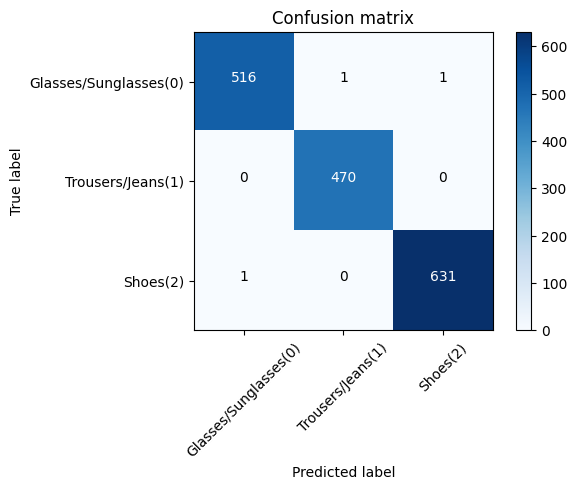

In [47]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(labels_test, predictions_class, labels=[0,1,2])
np.set_printoptions(precision=2)

print (metrics.classification_report(labels_test, predictions_class))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Glasses/Sunglasses(0)','Trousers/Jeans(1)','Shoes(2)'],normalize= False,  title='Confusion matrix')

# Launch TensorBoard  

Loading TensorBoard within the notebook to visualize training metrics such as loss and accuracy over epochs.  

In [52]:
%reload_ext tensorboard
%tensorboard --logdir "logs/fit/primary"